In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

# Create a list with the filepaths for training and testing
train_dir = Path('/content/drive/MyDrive/fruit and veg/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

test_dir = Path('/content/drive/MyDrive/fruit and veg/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

val_dir = Path('/content/drive/MyDrive/fruit and veg/validation')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

def proc_img(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)

    return df

train_df = proc_img(train_filepaths)
test_df = proc_img(test_filepaths)
val_df = proc_img(val_filepaths)


In [ ]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 151

Number of different labels: 2

Labels: ['turnip' 'watermelon']


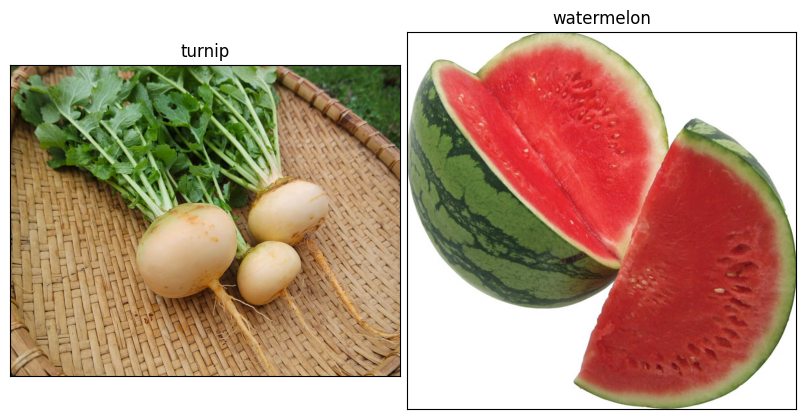

In [ ]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 151 validated image filenames belonging to 2 classes.
Found 20 validated image filenames belonging to 2 classes.
Found 20 validated image filenames belonging to 2 classes.


In [ ]:
# prompt: Load the Images with a generator and Data Augmentation

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0
)

val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)


Found 151 validated image filenames belonging to 2 classes.
Found 20 validated image filenames belonging to 2 classes.
Found 20 validated image filenames belonging to 2 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your image data generator with augmentations
train_generator = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

# Flow from directory
train_images = train_generator.flow_from_directory(
    directory='/content/drive/MyDrive/fruit and veg/train',  # Replace with the actual path to your data folder
    target_size=(224, 224),     # Resize images to 224x224
    color_mode='rgb',           # Use RGB images
    class_mode='categorical',   # For classification (one-hot encoded labels)
    batch_size=32,              # Set batch size
    shuffle=True,               # Shuffle the images
    seed=0                      # Ensure reproducibility with a seed
)

val_images = train_generator.flow_from_directory(
    directory='/content/drive/MyDrive/fruit and veg/validation',  # Replace with the actual path to your data folder
    target_size=(224, 224),     # Resize images to 224x224
    color_mode='rgb',           # Use RGB images
    class_mode='categorical',   # For classification (one-hot encoded labels)
    batch_size=32,              # Set batch size
    shuffle=True,               # Shuffle the images
    seed=0                      # Ensure reproducibility with a seed
)

test_images = train_generator.flow_from_directory(
    directory='/content/drive/MyDrive/fruit and veg/test',  # Replace with the actual path to your data folder
    target_size=(224, 224),     # Resize images to 224x224
    color_mode='rgb',           # Use RGB images
    class_mode='categorical',   # For classification (one-hot encoded labels)
    batch_size=32,              # Set batch size
    shuffle=True,               # Shuffle the images
    seed=0                      # Ensure reproducibility with a seed
)

Found 168 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:

# Load the pretained model
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [ ]:
import tensorflow as tf

# Assuming you've already loaded the pre-trained model
# Example: pretrained_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Getting the inputs from the pre-trained model
inputs = pretrained_model.input

# Adding new layers on top of the pre-trained model
# Since the output is already flattened, we don't need GlobalAveragePooling2D
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

# Update output layer to match the number of classes (2 for your case)
outputs = tf.keras.layers.Dense(2, activation='softmax')(x)

# Create the new model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_images,                         # Use the previously created train_images from flow_from_directory
    validation_data=val_images,           # Use your validation dataset (adjust if needed)
    batch_size=32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)


Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5024 - loss: 0.8247 - val_accuracy: 0.7500 - val_loss: 0.4871
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.7718 - loss: 0.5342 - val_accuracy: 0.9000 - val_loss: 0.3790
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8056 - loss: 0.4881 - val_accuracy: 0.9500 - val_loss: 0.2738
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.7950 - loss: 0.4601 - val_accuracy: 0.7500 - val_loss: 0.3576
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8640 - loss: 0.3440 - val_accuracy: 1.0000 - val_loss: 0.2078


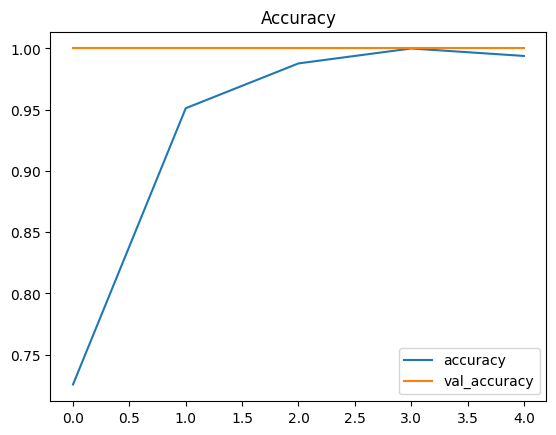

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

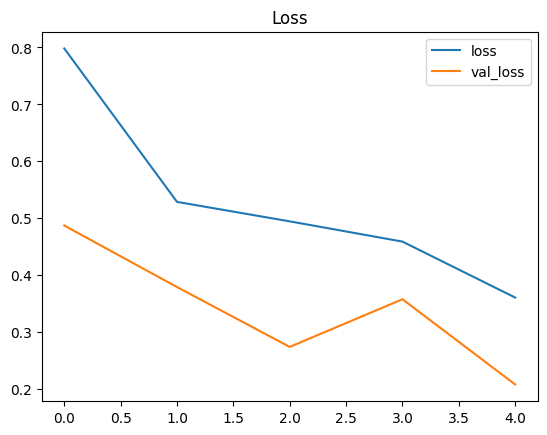

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = [labels[k] for k in test_images.classes]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(f'Accuracy on the test set: {100*acc:.2f}%')

Accuracy on the test set: 50.00%


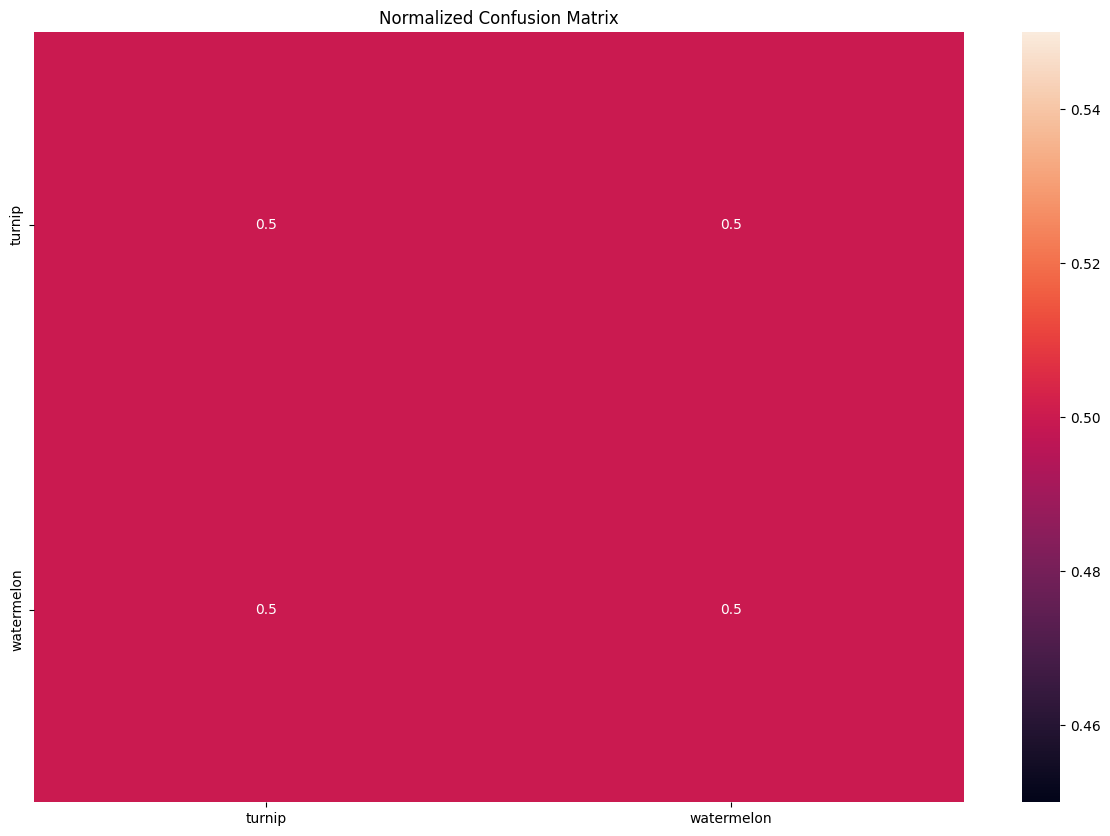

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix,
            annot=True,
            xticklabels = sorted(set(y_test)),
            yticklabels = sorted(set(y_test)),
            )
plt.title('Normalized Confusion Matrix')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Limit the number of images displayed to the number of images in test_df
num_images = min(9, len(test_df))  # Display up to 9 images or less if the dataset has fewer images

# Create a 3x3 grid of images
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12),  # Adjusted figsize for better spacing
                        subplot_kw={'xticks': [], 'yticks': []})

# Loop through the images and display them with their true labels and predictions
for i, ax in enumerate(axes.flat[:num_images]):  # Limit the loop to the available number of images
    # Read and display the image
    img = plt.imread(test_df.Filepath.iloc[i])
    ax.imshow(img)

    # Set the title with the true label and predicted label
    true_label = test_df.Label.iloc[i]
    predicted_label = pred[i]
    ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}", fontsize=12)

# Turn off any unused subplots
for ax in axes.flat[num_images:]:
    ax.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import matplotlib.cm as cm

def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size "size"
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
#     display(Image(cam_path))

    return cam_path

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

last_conv_layer_name = "Conv_1"
img_size = (224,224)

# Remove last layer's softmax
model.layers[-1].ativation = None

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


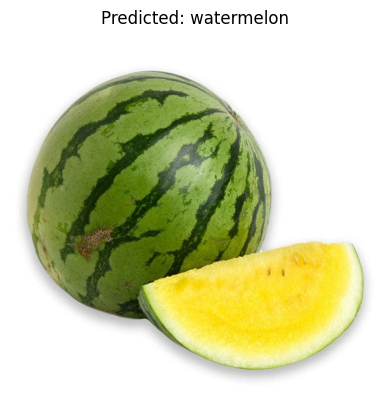

In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Function to preprocess the input image for prediction
def preprocess_image_from_url(img_url, size):
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content))  # Open image from URL response
    img = img.resize(size)  # Resize the image
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Function to predict the class of the image
def predict_and_display(img_url, model, class_names):
    # Preprocess the image from URL
    img_array = preprocess_image_from_url(img_url, size=(224, 224))

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions, axis=1)[0]
    predicted_label = class_names[predicted_index]

    # Display the image with the predicted label
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content))  # Open image again for display
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')  # Remove axes for cleaner display
    plt.show()

# Define your class names
class_names = ["turnip", "watermelon"]

# Example usage with a URL
img_url = "https://www.melissas.com/cdn/shop/files/image-of-organic-mini-yellow-seedless-watermelons-fruit-33928188919852_600x600.jpg?v=1683550910"  # Image URL
predict_and_display(img_url, model, class_names)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


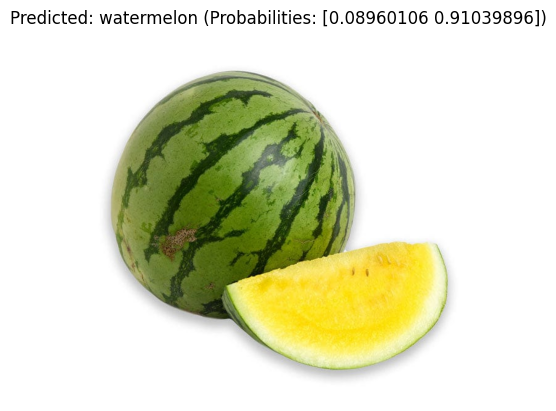

In [ ]:
# Function to predict the class of the image and show probabilities
def predict_and_display(img_url, model, class_names):
    # Preprocess the image from URL
    img_array = preprocess_image_from_url(img_url, size=(224, 224))

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions, axis=1)[0]
    predicted_label = class_names[predicted_index]

    # Get prediction probabilities
    predicted_probs = predictions[0]

    # Display the image with the predicted label and probabilities
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content))  # Open image again for display
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label} (Probabilities: {predicted_probs})")
    plt.axis('off')  # Remove axes for cleaner display
    plt.show()

# Define your class names
class_names = ["turnip", "watermelon"]

# Example usage with a URL
img_url = "https://www.melissas.com/cdn/shop/files/image-of-organic-mini-yellow-seedless-watermelons-fruit-33928188919852_600x600.jpg?v=1683550910"  # Image URL
predict_and_display(img_url, model, class_names)
